In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = 'labeled_functionlv_embeddings.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path)

In [ ]:
# 打乱数据框的行
df = df.sample(frac=1)

In [ ]:
df

,code_embedding,label
1133,"[0.010955006815493107, 0.014615193009376526, 0...",1
655,"[0.00918059516698122, -0.021366743370890617, 0...",0
349,"[-0.001998808002099395, 0.003456237493082881, ...",0
472,"[0.028094198554754257, 0.015297504141926765, -...",0
884,"[0.010629708878695965, -0.0009123386116698384,...",1
...,...,...
449,"[0.04019691422581673, -0.011154386214911938, 0...",0
944,"[0.019438449293375015, 0.003892897628247738, 0...",1
197,"[0.027853526175022125, 0.0027659921906888485, ...",0
979,"[0.02805241011083126, -0.004251614212989807, 0...",1


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.head(5)

,code_embedding,label
1133,"[0.010955006815493107, 0.014615193009376526, 0...",1
655,"[0.00918059516698122, -0.021366743370890617, 0...",0
349,"[-0.001998808002099395, 0.003456237493082881, ...",0
472,"[0.028094198554754257, 0.015297504141926765, -...",0
884,"[0.010629708878695965, -0.0009123386116698384,...",1


In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, AUC
import numpy as np
import ast

# 提取嵌入向量和标签
embeddings = np.stack(df['code_embedding'].apply(lambda x: np.array(ast.literal_eval(x))).values)
labels = df['label'].values

# 转换嵌入和标签为 TensorFlow 张量
X = tf.convert_to_tensor(embeddings, dtype=tf.float32)
y = tf.convert_to_tensor(labels, dtype=tf.int32)

# 分类任务的类别数量
num_classes = len(set(labels))
num_samples, embedding_dim = embeddings.shape

# Define the classifier
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(embedding_dim,)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

precision = Precision(name='precision')
recall = Recall(name='recall')
auc = AUC(name='auc', curve='ROC')

# 编译模型
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', auc])

# 划分训练集和验证集
train_frac = 0.8
train_size = int(num_samples * train_frac)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# 训练模型
# model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))


KeyboardInterrupt: ignored

In [ ]:
print(embedding_dim)

1536


Epoch 1/20
59/59 [==============================] - 2s 14ms/step - loss: 0.6483 - accuracy: 0.6305 - auc: 0.5950 - val_loss: 0.6168 - val_accuracy: 0.6352 - val_auc: 0.9293
Epoch 2/20
59/59 [==============================] - 0s 5ms/step - loss: 0.5939 - accuracy: 0.6466 - auc: 0.8366 - val_loss: 0.5624 - val_accuracy: 0.6438 - val_auc: 0.9400
Epoch 3/20
59/59 [==============================] - 0s 5ms/step - loss: 0.5276 - accuracy: 0.7250 - auc: 0.9321 - val_loss: 0.5029 - val_accuracy: 0.7511 - val_auc: 0.9493
Epoch 4/20
59/59 [==============================] - 0s 5ms/step - loss: 0.4598 - accuracy: 0.8185 - auc: 0.9452 - val_loss: 0.4393 - val_accuracy: 0.8197 - val_auc: 0.9521
Epoch 5/20
59/59 [==============================] - 0s 5ms/step - loss: 0.3898 - accuracy: 0.8743 - auc: 0.9617 - val_loss: 0.3855 - val_accuracy: 0.8670 - val_auc: 0.9570
Epoch 6/20
59/59 [==============================] - 0s 8ms/step - loss: 0.3340 - accuracy: 0.9033 - auc: 0.9691 - val_loss: 0.3398 - val_ac

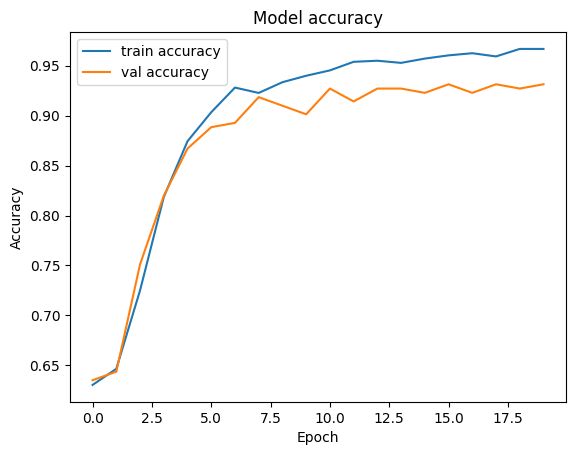

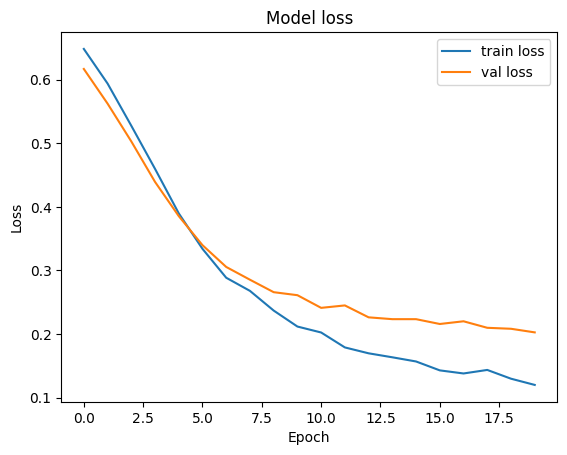

In [ ]:
import matplotlib.pyplot as plt

# 训练模型
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

# 绘制训练集和验证集的准确率随epoch的变化
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 绘制训练集和验证集的损失函数随epoch的变化
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()